In [2]:
#.Packages
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import correlate
import fathon
from fathon import fathonUtils as fu
plt.style.use(['science','notebook'])

In [3]:
#.Data reading
p_darwin = './data/soi_dar.dat'
p_tahiti = './data/soi_tah.dat'
p_soi = './data/soi_3dp.dat'
p_bei = './data/BEI.dat'

paths = [p_darwin, p_tahiti, p_soi, p_bei]
df = []
for i in range(4):
    p = paths[i]
    df.append(pd.read_table(paths[i], header=None, delim_whitespace=True))
darwin = df[0]
tahiti = df[1]
soi = df[2]
bei = df[3]

In [4]:
#.Data tidying

#.Rename columns
darwin.rename(columns={0: 'Year'},inplace=True)
tahiti.rename(columns={0: 'Year'},inplace=True)
soi.rename(columns={0: 'Year', 13:'Annual'},inplace=True)
bei.rename(columns={0: 'Year'},inplace=True)

#.Write nan values
darwin[darwin==-990]=np.nan
tahiti[tahiti==-990]=np.nan
soi[soi==99.990]=np.nan
soi[soi==-99.990]=np.nan
bei.rename(columns={0: 'Year'},inplace=True)

#.Pivot data
darwin = darwin.reset_index()
da=pd.melt(darwin, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

tahiti = tahiti.reset_index()
ta=pd.melt(tahiti, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

soi = soi.reset_index()
so=pd.melt(soi, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12,'Annual'],var_name='Month',value_name='Pressure')

bei = bei.reset_index()
be=pd.melt(bei, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

#.Drop nan values
so.dropna()
ta.dropna()
da.dropna()
be.dropna()

#Join all data
historical = da.merge(ta, how='inner', on=['Year','Month'])  #Add tahiti to darwin measurements
historical = historical.merge(so, how='inner', on=['Year','Month'])  #Add SOI index
historical = historical.rename(columns={'Pressure_x':'Darwin','Pressure_y':'Tahiti','Pressure':'SOI'}) 
#.Divide by 10 some measurements
historical['Darwin'] = historical['Darwin'] / 10
historical['Tahiti'] = historical['Tahiti'] / 10
historical.dropna()
historical.sort_values(by=['Year','Month'],inplace=True)
#.Dataframe with dates (without days)
dates = pd.to_datetime(historical['Month'].astype(str)+'/'+historical['Year'].astype(str)).dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [5]:
darwin = historical['Darwin']
tahity = historical['Tahiti']
soi = historical['SOI']
year = historical['Year']
bei = be['Pressure']
year_2 = be['Year']

In [6]:
a = fu.toAggregated(darwin)
b = fu.toAggregated(tahity)
c = fu.toAggregated(soi)
print(len(a),len(b),len(c))

1872 1872 1872


In [7]:
mfdfa_dar = fathon.MFDFA(a)
mfdfa_tah = fathon.MFDFA(b)
mfdfa_soi = fathon.MFDFA(c)

qs = np.arange(-10, 11)
revseg = False
polord = 1 
clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
logbase = 10
start = 5
end = 400

In [8]:
### MFDFA Darwin

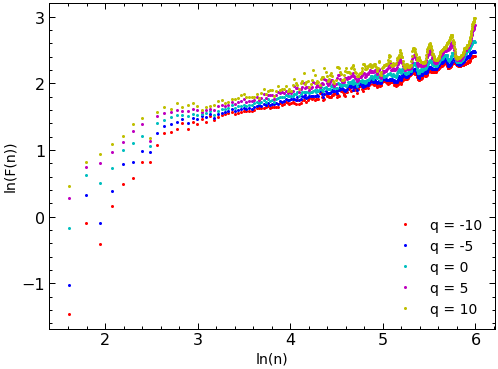

In [9]:
mar = 2
winSizes = fu.linRangeByStep(start, end)
n_dar, F_dar = mfdfa_dar.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_dar, list_H_intercept_dar = mfdfa_dar.fitFlucVec()
 
plt.plot(np.log(n_dar), np.log(F_dar[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_dar), np.log(F_dar[5, :]), 'bo', ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_dar), np.log(F_dar[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_dar), np.log(F_dar[-6, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_dar), np.log(F_dar[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(s)', fontsize=14)
plt.ylabel('ln(F(s))', fontsize=14)
#plt.title('./fig/MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('MFDFA_dar.pdf')
plt.show()


### MFDFA Tahity

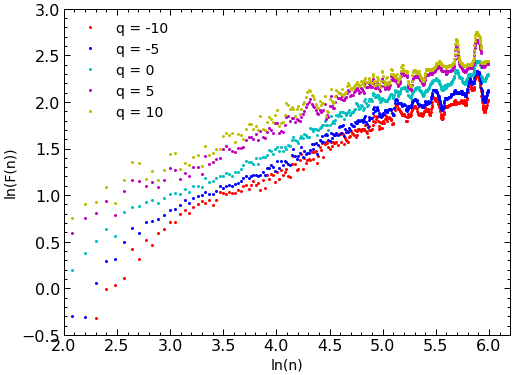

In [10]:
winSizes = fu.linRangeByStep(start, end)
n_tah, F_tah = mfdfa_tah.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_tah, list_H_intercept_tah = mfdfa_tah.fitFlucVec()

plt.plot(np.log(n_tah), np.log(F_tah[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_tah), np.log(F_tah[5, :]), 'bo', ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_tah), np.log(F_tah[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_tah), np.log(F_tah[-5, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_tah), np.log(F_tah[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(s)', fontsize=14)
plt.ylabel('ln(F(s))', fontsize=14)
#plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('./fig/MFDFA_tah.pdf')
plt.xlim([2,6.2])
plt.ylim([-0.5,3.])
plt.show()

### MFDFA SOI

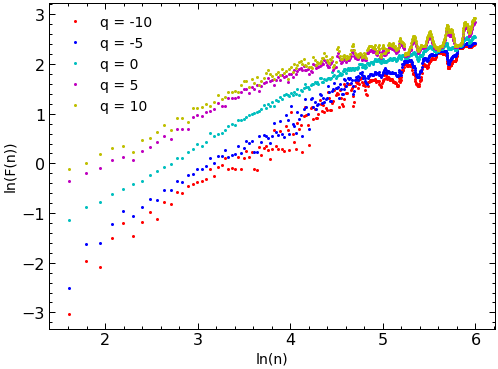

In [11]:
winSizes = fu.linRangeByStep(start, end)
n_soi, F_soi = mfdfa_soi.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_soi, list_H_intercept_soi = mfdfa_soi.fitFlucVec()

plt.plot(np.log(n_soi), np.log(F_soi[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_soi), np.log(F_soi[5, :]), 'bo',ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_soi), np.log(F_soi[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_soi), np.log(F_soi[-5, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_soi), np.log(F_soi[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(s)', fontsize=14)
plt.ylabel('ln(F(s))', fontsize=14)
#plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('./fig/MFDFA_soi.pdf')
plt.show()


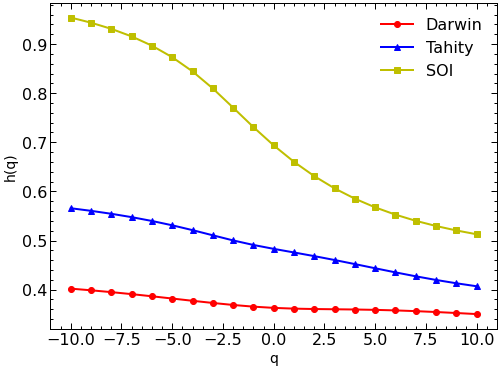

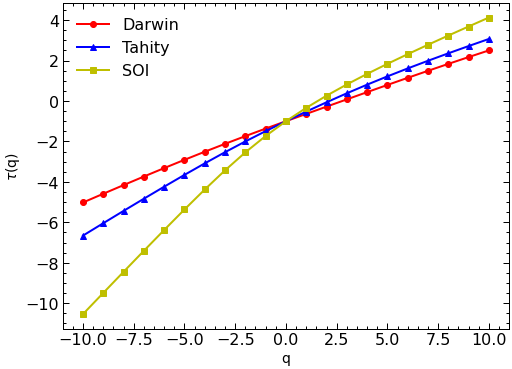

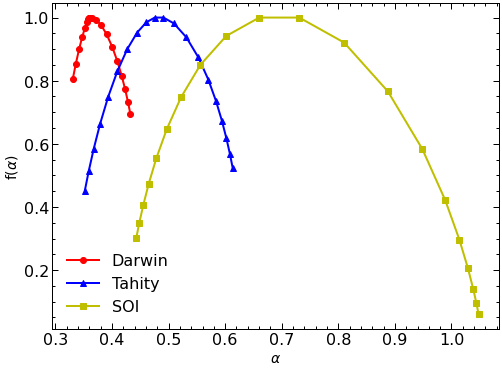

In [12]:
plt.plot(qs, list_H_dar, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_tah, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_soi, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
#plt.title('h(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/H.pdf')
plt.show()

tau_dar = mfdfa_dar.computeMassExponents()
tau_tah = mfdfa_tah.computeMassExponents()
tau_soi = mfdfa_soi.computeMassExponents()
plt.plot(qs, tau_dar, 'ro-', label='Darwin')
plt.plot(qs, tau_tah, 'b^-', label='Tahity')
plt.plot(qs, tau_soi, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
#plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/tau.pdf')
plt.show()

alpha_dar, mfSpect_dar = mfdfa_dar.computeMultifractalSpectrum()
alpha_tah, mfSpect_tah = mfdfa_tah.computeMultifractalSpectrum()
alpha_soi, mfSpect_soi = mfdfa_soi.computeMultifractalSpectrum()
plt.plot(alpha_dar[:], mfSpect_dar[:], 'ro-', label='Darwin')
plt.plot(alpha_tah[:], mfSpect_tah[:], 'b^-', label='Tahity')
plt.plot(alpha_soi[:], mfSpect_soi[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
#plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
#plt.savefig('fig/spectrum.pdf')
plt.show()

#### Interpolación con polinomio de cuarto orden

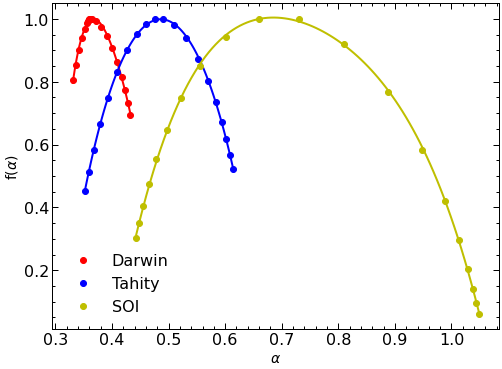

In [13]:
#darwin
pdar = np.poly1d(np.polyfit(alpha_dar[:], mfSpect_dar[:],4))
xdar = np.linspace(alpha_dar[0],alpha_dar[-1],100)
plt.plot(alpha_dar[:], mfSpect_dar[:], 'ro', label='Darwin')
plt.plot(xdar,pdar(xdar), 'r-')
#tahity
ptah = np.poly1d(np.polyfit(alpha_tah[:], mfSpect_tah[:],4))
xtah = np.linspace(alpha_tah[0],alpha_tah[-1],100)
plt.plot(alpha_tah[:], mfSpect_tah[:], 'bo', label='Tahity')
plt.plot(xtah,ptah(xtah), 'b-')
#soi
psoi = np.poly1d(np.polyfit(alpha_soi[:], mfSpect_soi[:],4))
xsoi = np.linspace(alpha_soi[0],alpha_soi[-1],100)
plt.plot(alpha_soi[:], mfSpect_soi[:], 'yo', label='SOI')
plt.plot(xsoi,psoi(xsoi), 'y-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.legend()
#plt.savefig('fig/interp_spec.pdf')
plt.show()

#### Características del espectro multifractal

Vamos a calcular $\alpha_{min}$, $\alpha_{max}$, $\alpha_0$, $f(\alpha_{min})$, $f(\alpha_{max})$, $\omega = \alpha_{max}-\alpha_{min}$ y $a_s = f(\alpha_{min})-f(\alpha_{max})$

In [14]:
#Darwin
amin_dar = alpha_dar[-1]
amax_dar = alpha_dar[0]
fmin_dar = mfSpect_dar[-1]
fmax_dar = mfSpect_dar[0]
w_dar = amax_dar - amin_dar
as_dar = fmin_dar - fmax_dar

#Tahity
amin_tah = alpha_tah[-1]
amax_tah = alpha_tah[0]
fmin_tah = mfSpect_tah[-1]
fmax_tah = mfSpect_tah[0]
w_tah = amax_tah - amin_tah
as_tah = fmin_tah - fmax_tah

#SOI
amin_soi = alpha_soi[-1]
amax_soi = alpha_soi[0]
fmin_soi = mfSpect_soi[-1]
fmax_soi = mfSpect_soi[0]
w_soi = amax_soi - amin_soi
as_soi = fmin_soi - fmax_soi

print("Darwin: ", amin_dar, amax_dar, fmin_dar, fmax_dar, w_dar, as_dar)
print("Tahity: ", amin_tah, amax_tah, fmin_tah, fmax_tah, w_tah, as_tah)
print("SOI: ", amin_soi, amax_soi, fmin_soi, fmax_soi, w_soi, as_soi)

Darwin:  0.33069910569511585 0.43243816184008743 0.8050642464889619 0.6954864817587136 0.10173905614497158 0.10957776473024827
Tahity:  0.35206840912391524 0.6134119810801666 0.4521735292030069 0.5231153242336735 0.26134357195625135 -0.07094179503066655
SOI:  0.4428743884730739 1.047919942547658 0.3013219190671954 0.06084533897651667 0.605045554074584 0.24047658009067874


In [15]:
import scipy
result_dar = scipy.optimize.minimize_scalar(-1*pdar, bounds=(alpha_dar[-1],alpha_dar[0]), method='bounded')
result_tah = scipy.optimize.minimize_scalar(-1*ptah, bounds=(alpha_tah[-1],alpha_tah[0]), method='bounded')
result_soi = scipy.optimize.minimize_scalar(-1*psoi, bounds=(alpha_soi[-1],alpha_soi[0]), method='bounded')

print(result_dar)
print(result_tah)
print(result_soi)
#chequeo que la solucion sea la correcta
print(pdar(0.3238282876502501), ptah(0.44707476672827), psoi(0.646806325965434)) 

     fun: -0.9990898463749431
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.36759584516748345
     fun: -0.9987498286570897
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 0.48625224467811434
     fun: -1.0040984010054572
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.6853014944987762
0.6964779377750574 0.9568818166190081 0.9935891823547554


## Fuentes de multifractalidad

Two sources of multifractality can be recognized:

1. Multifractality due to a broad probability density function of the values of the series
2. Different long range correlations for small and large fluctuations.

To test the type of multifractality one can remove the temporal correlations by random shuffling the series. If the multifractality is of the type stated in the second case the spectrum should be significantly narrowed. Random  shuffling simply consists of generating a new time series by randomly permuting the elements of the original series. in order to check if multifractality comes from broad distributions we analyze surrogate data. To generate them we apply amplitude adjusted fourier transform to the original series. The surrogate time series data did not destroy the correlation characteristics of the original time series data, it only weakened the Gaussian distribution of the original time series data. Therefore, if the multifractality comes from broad distributions, the spectrum of the surrogated series should show the absence of multifractality

### Shuffle data

In [15]:
darn = darwin.to_numpy()
tahn = tahity.to_numpy()
soin = soi.to_numpy()

In [16]:
darn = darwin.sample(frac=1)
tahn = tahity.sample(frac=1)
soin = soi.sample(frac=1)

In [17]:
sa = fu.toAggregated(darn)
sb = fu.toAggregated(tahn)
sc = fu.toAggregated(soin)
print(len(sa),len(sb),len(sc))
mfdfa_sdar = fathon.MFDFA(sa)
mfdfa_stah = fathon.MFDFA(sb)
mfdfa_ssoi = fathon.MFDFA(sc)
winSizes = fu.linRangeByStep(start, end)

1872 1872 1872


In [18]:
# Darwin
n_sdar, F_sdar = mfdfa_sdar.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_sdar, list_H_intercept_sdar = mfdfa_sdar.fitFlucVec()

# Tahity
n_stah, F_stah = mfdfa_stah.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_stah, list_H_intercept_stah = mfdfa_stah.fitFlucVec()

# SOI
n_ssoi, F_ssoi = mfdfa_ssoi.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_ssoi, list_H_intercept_ssoi = mfdfa_ssoi.fitFlucVec()

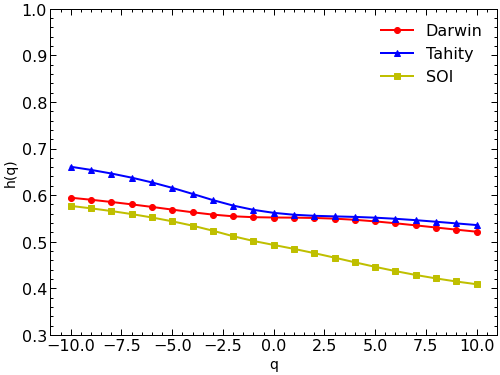

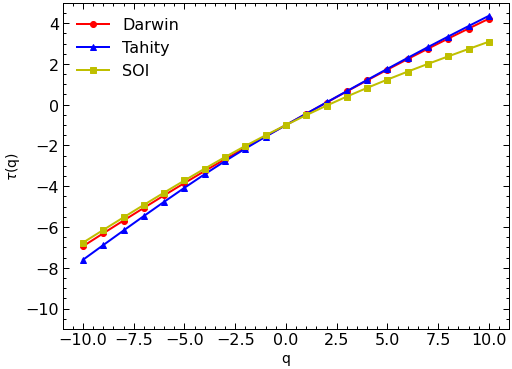

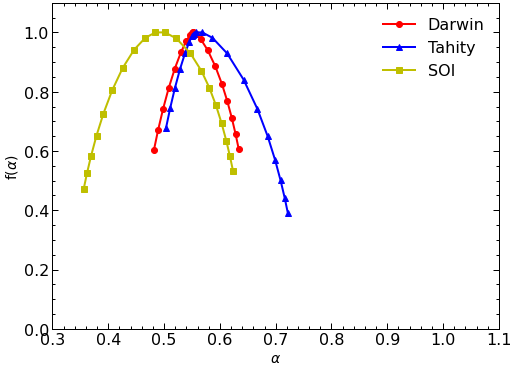

In [19]:
plt.plot(qs, list_H_sdar, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_stah, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_ssoi, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
#plt.title('h(q)', fontsize=14)
plt.legend()
plt.ylim(0.3,1)
plt.savefig('fig/H_shuffle.pdf')
plt.show()

tau_sdar = mfdfa_sdar.computeMassExponents()
tau_stah = mfdfa_stah.computeMassExponents()
tau_ssoi = mfdfa_ssoi.computeMassExponents()
plt.plot(qs, tau_sdar, 'ro-', label='Darwin')
plt.plot(qs, tau_stah, 'b^-', label='Tahity')
plt.plot(qs, tau_ssoi, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
#plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
plt.ylim(-11,5)
plt.savefig('fig/tau_shuffle.pdf')
plt.show()

alpha_sdar, mfSpect_sdar = mfdfa_sdar.computeMultifractalSpectrum()
alpha_stah, mfSpect_stah = mfdfa_stah.computeMultifractalSpectrum()
alpha_ssoi, mfSpect_ssoi = mfdfa_ssoi.computeMultifractalSpectrum()
plt.plot(alpha_sdar[:], mfSpect_sdar[:], 'ro-', label='Darwin')
plt.plot(alpha_stah[:], mfSpect_stah[:], 'b^-', label='Tahity')
plt.plot(alpha_ssoi[:], mfSpect_ssoi[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
#plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
plt.xlim(0.3,1.1)
plt.ylim(0,1.1)
plt.savefig('fig/spectrum_shuffle.pdf')
plt.show()

### Surrogate data

In [20]:
dar_fourier = np.fft.rfft(darwin)
random_phases_dar = np.exp(np.random.uniform(0,np.pi,len(darwin)//2+1)*1.0j)
dar_fourier_new = dar_fourier*random_phases_dar
new_dar = np.fft.irfft(dar_fourier_new)

tah_fourier = np.fft.rfft(tahity)
random_phases_tah = np.exp(np.random.uniform(0,np.pi,len(tahity)//2+1)*1.0j)
tah_fourier_new = tah_fourier*random_phases_tah
new_tah = np.fft.irfft(tah_fourier_new)

ts_fourier = np.fft.rfft(soi)
random_phases = np.exp(np.random.uniform(0,np.pi,len(soi)//2+1)*1.0j)
ts_fourier_new = ts_fourier*random_phases
new_soi = np.fft.irfft(ts_fourier_new)

In [21]:
fa = fu.toAggregated(new_dar)
mfdfa_fdar = fathon.MFDFA(fa)

fb = fu.toAggregated(new_tah)
mfdfa_ftah = fathon.MFDFA(fb)

fc = fu.toAggregated(new_soi)
mfdfa_fsoi = fathon.MFDFA(fa)

winSizes = fu.linRangeByStep(start, end)

In [22]:
# Darwin
n_fdar, F_fdar = mfdfa_fdar.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fdar, list_H_intercept_fdar = mfdfa_fdar.fitFlucVec()

# Tahity
n_ftah, F_ftah = mfdfa_ftah.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_ftah, list_H_intercept_ftah = mfdfa_ftah.fitFlucVec()

# SOI
n_fsoi, F_fsoi = mfdfa_fsoi.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fsoi, list_H_intercept_fsoi = mfdfa_fsoi.fitFlucVec()

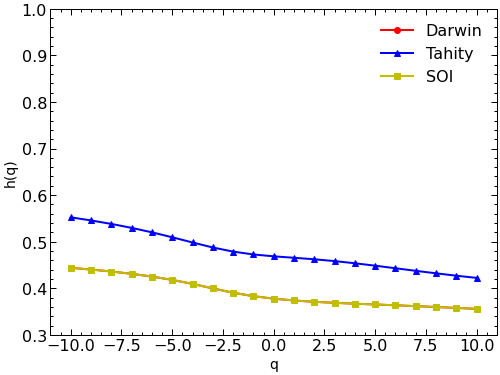

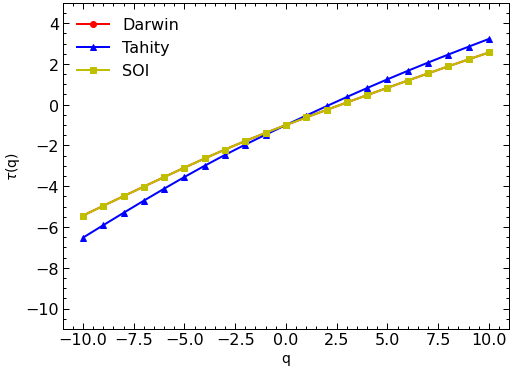

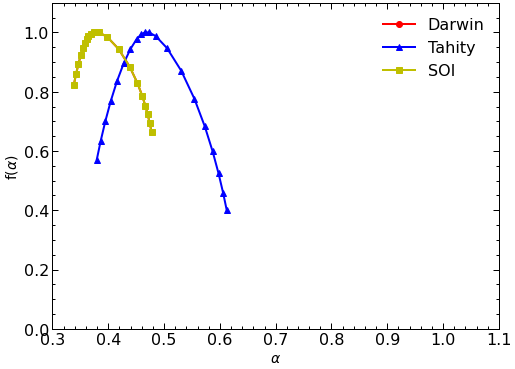

In [23]:
plt.plot(qs, list_H_fdar, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_ftah, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_fsoi, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
#plt.title('h(q)', fontsize=14)
plt.legend()
plt.ylim(0.3,1)
#plt.savefig('fig/H_surrogate.pdf')
plt.show()

tau_fdar = mfdfa_fdar.computeMassExponents()
tau_ftah = mfdfa_ftah.computeMassExponents()
tau_fsoi = mfdfa_fsoi.computeMassExponents()
plt.plot(qs, tau_fdar, 'ro-', label='Darwin')
plt.plot(qs, tau_ftah, 'b^-', label='Tahity')
plt.plot(qs, tau_fsoi, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
#plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
plt.ylim(-11,5)
#plt.savefig('fig/tau_surrogate.pdf')
plt.show()

alpha_fdar, mfSpect_fdar = mfdfa_fdar.computeMultifractalSpectrum()
alpha_ftah, mfSpect_ftah = mfdfa_ftah.computeMultifractalSpectrum()
alpha_fsoi, mfSpect_fsoi = mfdfa_fsoi.computeMultifractalSpectrum()
plt.plot(alpha_fdar[:], mfSpect_fdar[:], 'ro-', label='Darwin')
plt.plot(alpha_ftah[:], mfSpect_ftah[:], 'b^-', label='Tahity')
plt.plot(alpha_fsoi[:], mfSpect_fsoi[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
#plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
plt.xlim(0.3,1.1)
plt.ylim(0,1.1)
#plt.savefig('fig/spectrum_surrogate.pdf')
plt.show()

In [46]:
### Surrogate data 2

In [25]:
import iaaft

In [31]:
xdar = iaaft.surrogates(x=darwin, ns=5, verbose=True)
xtah = iaaft.surrogates(x=tahity, ns=5, verbose=True)
xsoi = iaaft.surrogates(x=soi, ns=5, verbose=True)

Estim100%|██████████████████████████████| 5/5 [00:00<00:00, 61.74it/s]


In [39]:
fa2 = fu.toAggregated(xdar[1])
mfdfa_fdar2 = fathon.MFDFA(fa2)

fb2 = fu.toAggregated(xtah[1])
mfdfa_ftah2 = fathon.MFDFA(fb2)

fc2 = fu.toAggregated(xsoi[1])
mfdfa_fsoi2 = fathon.MFDFA(fc2)

In [40]:
n_fdar2, F_fdar2 = mfdfa_fdar2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fdar2, list_H_intercept_fdar2 = mfdfa_fdar2.fitFlucVec()

n_ftahr2, F_ftah2 = mfdfa_ftah2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_ftah2, list_H_intercept_ftah2 = mfdfa_ftah2.fitFlucVec()

n_fsoi2, F_fsoi2 = mfdfa_fsoi2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fsoi2, list_H_intercept_fsoi2 = mfdfa_fsoi2.fitFlucVec()

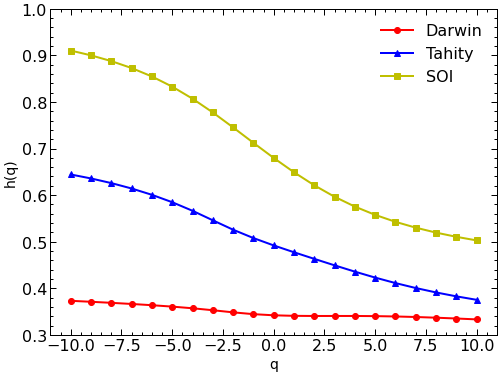

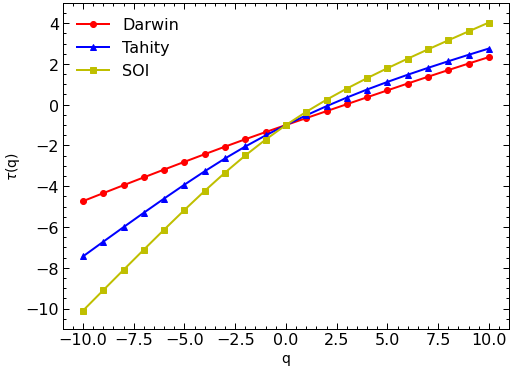

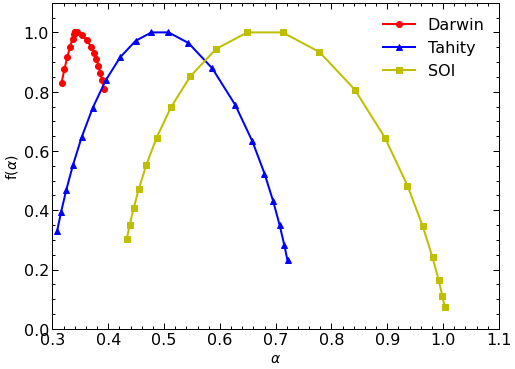

In [41]:
plt.plot(qs, list_H_fdar2, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_ftah2, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_fsoi2, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
#plt.title('h(q)', fontsize=14)
plt.legend()
plt.ylim(0.3,1)
#plt.savefig('fig/H_surro.pdf')
plt.show()

tau_fdar2 = mfdfa_fdar2.computeMassExponents()
tau_ftah2 = mfdfa_ftah2.computeMassExponents()
tau_fsoi2 = mfdfa_fsoi2.computeMassExponents()
plt.plot(qs, tau_fdar2, 'ro-', label='Darwin')
plt.plot(qs, tau_ftah2, 'b^-', label='Tahity')
plt.plot(qs, tau_fsoi2, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
#plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
plt.ylim(-11,5)
#plt.savefig('fig/tau_surro.pdf')
plt.show()

alpha_fdar2, mfSpect_fdar2 = mfdfa_fdar2.computeMultifractalSpectrum()
alpha_ftah2, mfSpect_ftah2 = mfdfa_ftah2.computeMultifractalSpectrum()
alpha_fsoi2, mfSpect_fsoi2 = mfdfa_fsoi2.computeMultifractalSpectrum()
plt.plot(alpha_fdar2[:], mfSpect_fdar2[:], 'ro-', label='Darwin')
plt.plot(alpha_ftah2[:], mfSpect_ftah2[:], 'b^-', label='Tahity')
plt.plot(alpha_fsoi2[:], mfSpect_fsoi2[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
#plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
plt.xlim(0.3,1.1)
plt.ylim(0,1.1)
#plt.savefig('fig/spectrum_surro.pdf')
plt.show()

In [43]:
fa2 = fu.toAggregated(xdar[4])
mfdfa_fdar2 = fathon.MFDFA(fa2)

fb2 = fu.toAggregated(xtah[4])
mfdfa_ftah2 = fathon.MFDFA(fb2)

fc2 = fu.toAggregated(xsoi[4])
mfdfa_fsoi2 = fathon.MFDFA(fc2)

In [44]:
n_fdar2, F_fdar2 = mfdfa_fdar2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fdar2, list_H_intercept_fdar2 = mfdfa_fdar2.fitFlucVec()

n_ftahr2, F_ftah2 = mfdfa_ftah2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_ftah2, list_H_intercept_ftah2 = mfdfa_ftah2.fitFlucVec()

n_fsoi2, F_fsoi2 = mfdfa_fsoi2.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = polord)
list_H_fsoi2, list_H_intercept_fsoi2 = mfdfa_fsoi2.fitFlucVec()

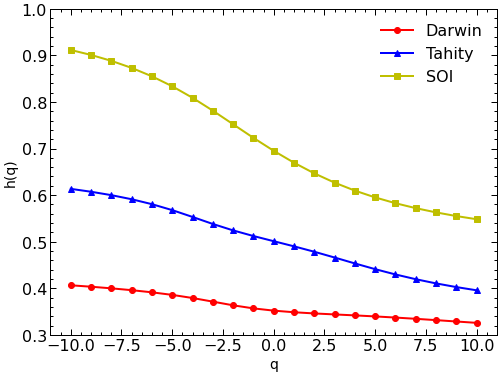

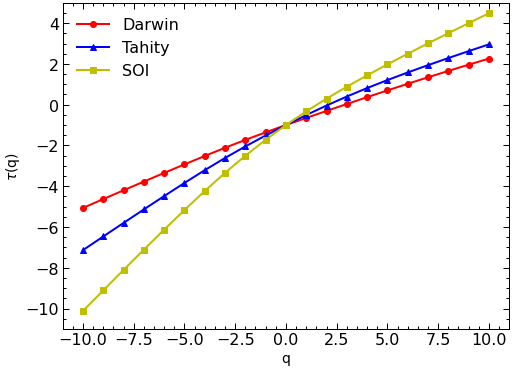

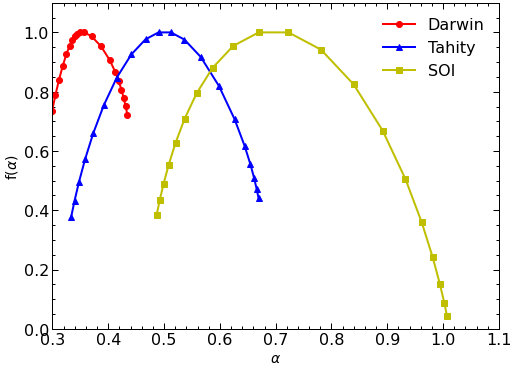

In [45]:
plt.plot(qs, list_H_fdar2, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_ftah2, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_fsoi2, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
#plt.title('h(q)', fontsize=14)
plt.legend()
plt.ylim(0.3,1)
#plt.savefig('fig/H_surro.pdf')
plt.show()

tau_fdar2 = mfdfa_fdar2.computeMassExponents()
tau_ftah2 = mfdfa_ftah2.computeMassExponents()
tau_fsoi2 = mfdfa_fsoi2.computeMassExponents()
plt.plot(qs, tau_fdar2, 'ro-', label='Darwin')
plt.plot(qs, tau_ftah2, 'b^-', label='Tahity')
plt.plot(qs, tau_fsoi2, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
#plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
plt.ylim(-11,5)
#plt.savefig('fig/tau_surro.pdf')
plt.show()

alpha_fdar2, mfSpect_fdar2 = mfdfa_fdar2.computeMultifractalSpectrum()
alpha_ftah2, mfSpect_ftah2 = mfdfa_ftah2.computeMultifractalSpectrum()
alpha_fsoi2, mfSpect_fsoi2 = mfdfa_fsoi2.computeMultifractalSpectrum()
plt.plot(alpha_fdar2[:], mfSpect_fdar2[:], 'ro-', label='Darwin')
plt.plot(alpha_ftah2[:], mfSpect_ftah2[:], 'b^-', label='Tahity')
plt.plot(alpha_fsoi2[:], mfSpect_fsoi2[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
#plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
plt.xlim(0.3,1.1)
plt.ylim(0,1.1)
#plt.savefig('fig/spectrum_surro.pdf')
plt.show()

### Comparación de los H(q)

Vamos a comparar el módulo de la diferencia de H(q) entre los datos originales y los datos shuffled y surrogate.

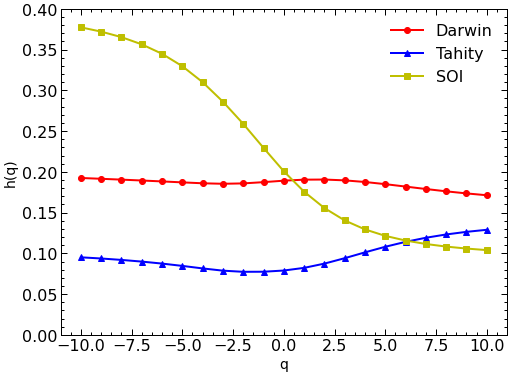

In [56]:
plt.plot(qs, np.abs(list_H_dar - list_H_sdar), 'ro-', label= 'Darwin')
plt.plot(qs, np.abs(list_H_tah - list_H_stah), 'b^-', label = 'Tahity')
plt.plot(qs, np.abs(list_H_soi - list_H_ssoi), 'ys-', label = 'SOI')

plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.ylim(0,0.4)
#plt.title('h(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/H-Hshuff.pdf')
plt.show()

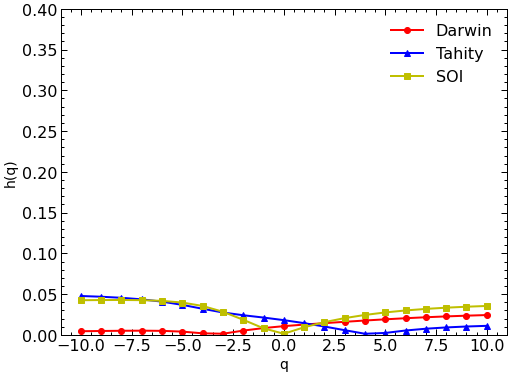

In [54]:
plt.plot(qs, np.abs(list_H_dar - list_H_fdar2), 'ro-', label= 'Darwin')
plt.plot(qs, np.abs(list_H_tah - list_H_ftah2), 'b^-', label = 'Tahity')
plt.plot(qs, np.abs(list_H_soi - list_H_fsoi2), 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.ylim(0,0.4)
#plt.title('h(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/H-Hsurr.pdf')
plt.show()